In [ ]:
from get_features import get_dataframes
dataframe = get_dataframes()
print(get_dataframes.__doc__)
help(get_dataframes)



In [ ]:
import pandas as pd
from allensdk.core.cell_types_cache import CellTypesCache
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

cells = ctc.get_cells(require_reconstruction = True)

cell_index = { c['id']: c for c in cells }
print(cell_index[485909730].keys())
print(cell_index[485909730])
label_features = ["id", "species", "structure_layer_name", "structure_area_abbrev", "dendrite_type"]

all_ids = [[item[feature] for feature in label_features] for item in cells]
print(all_ids)

dataframe_labels = pd.DataFrame(all_ids, columns = label_features)
#print(dataframe_labels)

filtered_dataframe_labels = dataframe_labels[dataframe_labels["dendrite_type"].isin(["spiny", "aspiny"])]
print(filtered_dataframe_labels)
print(filtered_dataframe_labels["dendrite_type"].unique())



In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le1.fit(filtered_dataframe_labels['dendrite_type'])
print(le1.classes_)
filtered_dataframe_labels['dendrite_type_number'] = le1.transform(filtered_dataframe_labels['dendrite_type'])
print(filtered_dataframe_labels[["dendrite_type", "dendrite_type_number"]])

le2.fit(filtered_dataframe_labels['structure_layer_name'])
print(le2.classes_)
filtered_dataframe_labels['structure_layer_name_number'] = le2.transform(filtered_dataframe_labels['structure_layer_name'])
print(filtered_dataframe_labels[["structure_layer_name", "structure_layer_name_number"]])

le3.fit(filtered_dataframe_labels['species'])
print(le3.classes_)
filtered_dataframe_labels['species_number'] = le3.transform(filtered_dataframe_labels['species'])
print(filtered_dataframe_labels[["species_number", "species_number"]])

['aspiny' 'spiny']
    dendrite_type  dendrite_type_number
0           spiny                     1
1           spiny                     1
2           spiny                     1
3           spiny                     1
4           spiny                     1
..            ...                   ...
662        aspiny                     0
663        aspiny                     0
664         spiny                     1
665         spiny                     1
666        aspiny                     0

[618 rows x 2 columns]
['1' '2' '2/3' '3' '4' '5' '6' '6a' '6b']
    structure_layer_name  structure_layer_name_number
0                      5                            5
1                      5                            5
2                      4                            4
3                      4                            4
4                      3                            3
..                   ...                          ...
662                    5                            5
663

/var/folders/kq/3njtzms15xs9q0tdhgp3xg1h0000gn/T/ipykernel_29923/127906441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['dendrite_type_number'] = le1.transform(filtered_dataframe_labels['dendrite_type'])
/var/folders/kq/3njtzms15xs9q0tdhgp3xg1h0000gn/T/ipykernel_29923/127906441.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['structure_layer_name_number'] = le2.transform(filtered_dataframe_labels['structure_layer_name'])
/var/folders/kq/3njtzms

In [4]:
from sklearn.preprocessing import OneHotEncoder
oneHB_area = OneHotEncoder()
oneHB_area.fit(filtered_dataframe_labels["structure_area_abbrev"].unique().reshape(1, -1))

#transformed_data = oneHB_area.transform(filtered_dataframe_labels['structure_area_abbrev'].to_numpy().reshape(1, -1))
new_dataframe = pd.get_dummies(filtered_dataframe_labels, columns = ["structure_area_abbrev"])
#filtered_dataframe_labels['structure_area_abbrev_number'] = oneHB_area.transform(filtered_dataframe_labels['structure_area_abbrev'])
#print(filtered_dataframe_labels[["structure_area_abbrev", "structure_area_abbrev_number"]])

print(new_dataframe)

            id       species structure_layer_name dendrite_type  \
0    485909730  Mus musculus                    5         spiny   
1    323865917  Mus musculus                    5         spiny   
2    476135066  Mus musculus                    4         spiny   
3    502614426  Mus musculus                    4         spiny   
4    519832676  Homo Sapiens                    3         spiny   
..         ...           ...                  ...           ...   
662  561469082  Homo Sapiens                    5        aspiny   
663  554807924  Mus musculus                  2/3        aspiny   
664  512322162  Mus musculus                   6b         spiny   
665  601958555  Homo Sapiens                    4         spiny   
666  464212183  Mus musculus                    5        aspiny   

     dendrite_type_number  structure_layer_name_number  species_number  \
0                       1                            5               1   
1                       1                      

          id       species structure_layer_name structure_area_abbrev  \
0  485909730  Mus musculus                    5                  VISp   
1  323865917  Mus musculus                    5                  VISp   
2  476135066  Mus musculus                    4                  VISp   
3  502614426  Mus musculus                    4                 VISpl   
4  519832676  Homo Sapiens                    3                   MTG   

  dendrite_type  dendrite_type_number  structure_layer_name_number  \
0         spiny                     1                            5   
1         spiny                     1                            5   
2         spiny                     1                            4   
3         spiny                     1                            4   
4         spiny                     1                            3   

   species_number  
0               1  
1               1  
2               1  
3               1  
4               0  
[[3 0]
 [5 1]
 [4 1]

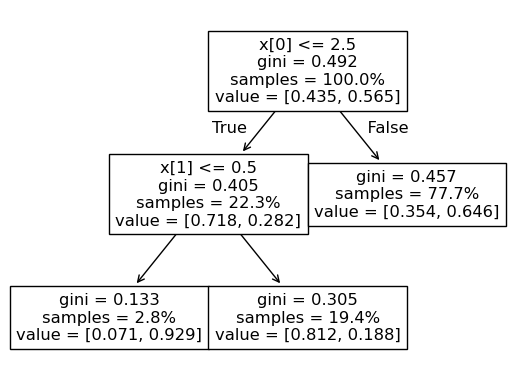

In [5]:
Y = filtered_dataframe_labels['dendrite_type_number']
X = filtered_dataframe_labels[["structure_layer_name_number", "species_number"]]

# print(len(X), len(Y)) # same number of rows
print(filtered_dataframe_labels[0:5])
import numpy as np

X = X.to_numpy()
Y = Y.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)
print(X_train)

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(clf, proportion=True)
plt.show()

# the tree shows which features it used to split at each node. First it split using the structure layer. if the sample was 
# less than 2.5 it went to the left side(true), and to the right if it was false. then it used the species to split the 
# data into two.

# gini index shoes how mixed the data is. the closer it is to 0.5, the more evenly mixed it is. The first node
# on the tree has a gini index of 0.492, showing that the data is evenly mixed. after each split, the index get smaller.
# this tells us that it is spliting correctly since everytime you split, the variety in data get smaller.
